### 1. Importando as Bibliotecas necessárias.

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

2025-09-22 10:01:16.536969: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-22 10:01:17.152811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-22 10:01:19.541581: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


### 2. Carregando os dados pre-processados.

In [2]:
# --- 1. Carregar os Dados Pré-processados ---
print("Carregando dados pré-processados...")
train_df = pd.read_csv('train_data_scaled_manual.csv')
test_df = pd.read_csv('test_data_scaled_manual.csv')

Carregando dados pré-processados...


### 3. Dividindo os dados em treino e teste.

In [3]:
# Definir quais colunas são features (entradas) e qual é o alvo (saída)
features = ['pressure_1', 'pressure_2', 'pressure_3', 'pressure_4', 'pressure_5', 'pressure_6', 'pressure_7']
target = 'liquid_flow_rate'

# Separar os dados em X (features) e y (alvo)
X_train = train_df[features]
y_train = train_df[target]

X_test = test_df[features]
y_test = test_df[target]

print("Dados carregados com sucesso!")

Dados carregados com sucesso!


### 4. Treinando o Modelo.

In [4]:
# --- 2. Preparar Dados para a LSTM ---
# A LSTM espera uma entrada 3D no formato: [amostras, timesteps, features]
# Para este caso, vamos usar 1 timestep, significando que olhamos para cada momento de forma independente.
X_train_reshaped = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

print(f"Dimensões dos dados de treino: {X_train_reshaped.shape}")
print(f"Dimensões dos dados de teste: {X_test_reshaped.shape}")

# --- 3. Construir o Modelo LSTM ---
print("\nConstruindo o modelo...")
model = Sequential()

# Adiciona uma camada LSTM com 50 neurônios (unidades)
# input_shape define o formato dos dados de entrada: (1 timestep, 7 features)
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))

# Adiciona a camada de saída com 1 neurônio, pois queremos prever um único valor (vazão de líquido)
model.add(Dense(1))

# Compila o modelo, definindo a função de perda e o otimizador
model.compile(loss='mean_squared_error', optimizer='adam')

# Exibe um resumo da arquitetura do modelo
model.summary()

# --- 4. Treinar o Modelo ---
print("\nIniciando o treinamento do modelo...")
# O treinamento ('fit') ajusta os pesos da rede neural para minimizar o erro
# validation_data é usado para monitorar a performance em dados não vistos durante o treino
history = model.fit(X_train_reshaped, y_train,
                    epochs=50,          # Número de vezes que o modelo verá todo o dataset
                    batch_size=72,        # Número de amostras por atualização dos pesos
                    validation_data=(X_test_reshaped, y_test),
                    verbose=2,          # Mostra uma linha por época
                    shuffle=False)

print("Treinamento concluído!")

Dimensões dos dados de treino: (28295, 1, 7)
Dimensões dos dados de teste: (7074, 1, 7)

Construindo o modelo...


E0000 00:00:1758546210.867638   37846 cuda_executor.cc:1309] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1758546210.877581   37846 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
/home/sidnei/Documentos/GitHub/virtual_flow_forecasting/venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        11,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,651 (45.51 KB)

 Trainable params: 11,651 (45.51 KB)

 Non-trainable params: 0 (0.00 B)


Iniciando o treinamento do modelo...
Epoch 1/50
393/393 - 5s - 12ms/step - loss: 0.0106 - val_loss: 0.0039
Epoch 2/50
393/393 - 1s - 3ms/step - loss: 0.0042 - val_loss: 0.0032
Epoch 3/50
393/393 - 1s - 3ms/step - loss: 0.0037 - val_loss: 0.0028
Epoch 4/50
393/393 - 1s - 3ms/step - loss: 0.0034 - val_loss: 0.0026
Epoch 5/50
393/393 - 3s - 7ms/step - loss: 0.0033 - val_loss: 0.0025
Epoch 6/50
393/393 - 2s - 5ms/step - loss: 0.0032 - val_loss: 0.0024
Epoch 7/50
393/393 - 2s - 4ms/step - loss: 0.0032 - val_loss: 0.0023
Epoch 8/50
393/393 - 2s - 5ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 9/50
393/393 - 1s - 3ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 10/50
393/393 - 1s - 3ms/step - loss: 0.0030 - val_loss: 0.0021
Epoch 11/50
393/393 - 1s - 3ms/step - loss: 0.0029 - val_loss: 0.0020
Epoch 12/50
393/393 - 1s - 3ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 13/50
393/393 - 1s - 3ms/step - loss: 0.0028 - val_loss: 0.0019
Epoch 14/50
393/393 - 2s - 4ms/step - loss: 0.0027 - val_los

### 5. Fazendo Previsões com o Modelo Treinado.


Fazendo previsões com os dados de teste...
222/222 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


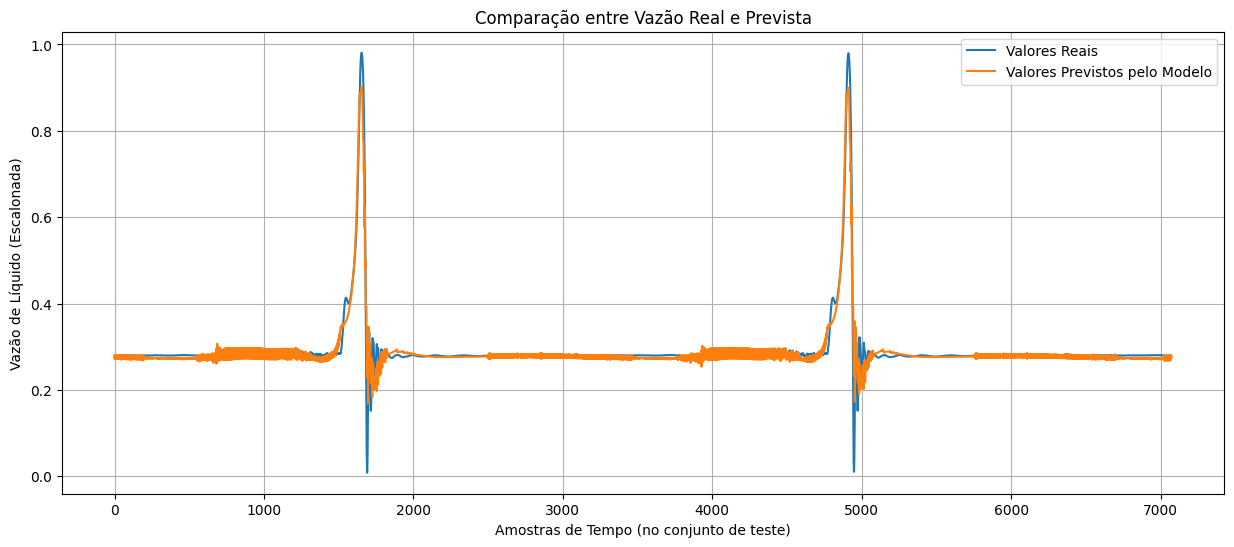

In [5]:
# --- 5. Fazer Previsões e Visualizar Resultados ---
print("\nFazendo previsões com os dados de teste...")
y_pred = model.predict(X_test_reshaped)

# Criar o gráfico
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Valores Reais')
plt.plot(y_pred, label='Valores Previstos pelo Modelo')
plt.title('Comparação entre Vazão Real e Prevista')
plt.xlabel('Amostras de Tempo (no conjunto de teste)')
plt.ylabel('Vazão de Líquido (Escalonada)')
plt.legend()
plt.grid(True)
plt.show()

### 6. Plotei o histórico de perda do treinamento.

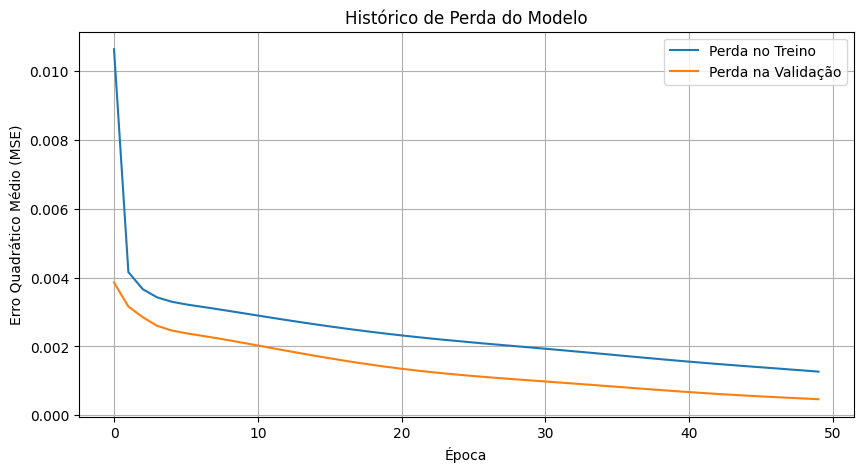

In [6]:
# Plotar o histórico de perda do modelo
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Perda no Treino')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Histórico de Perda do Modelo')
plt.xlabel('Época')
plt.ylabel('Erro Quadrático Médio (MSE)')
plt.legend()
plt.grid(True)
plt.show()

### 7. Avaliação do Modelo.

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# y_test são os valores reais (do conjunto de teste)
# y_pred são as previsões que o modelo já fez

# Calcular as métricas
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Raiz quadrada do MSE
mae = mean_absolute_error(y_test, y_pred)

print("\n--- Métricas de Avaliação do Modelo ---")
print(f"Erro Quadrático Médio (MSE): {mse:.6f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.6f}")
print(f"Erro Absoluto Médio (MAE): {mae:.6f}")
print("----------------------------------------")


--- Métricas de Avaliação do Modelo ---
Erro Quadrático Médio (MSE): 0.000463
Raiz do Erro Quadrático Médio (RMSE): 0.021523
Erro Absoluto Médio (MAE): 0.008902
----------------------------------------


### 8. Salvar o Modelo Treinado.

In [8]:
print("\nSalvando o modelo treinado...")

# O formato .keras é o mais moderno e recomendado.
# Ele salva tudo: a arquitetura do modelo, os pesos aprendidos e o estado do otimizador.
file_path = 'meu_modelo_lstm.keras'
model.save(file_path)

print(f"Modelo salvo com sucesso no arquivo: '{file_path}'")


Salvando o modelo treinado...
Modelo salvo com sucesso no arquivo: 'meu_modelo_lstm.keras'
